In [1]:
%matplotlib inline
import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

def read_data_from_h5(filename):
    import h5py

    data_dict = {}

    with h5py.File(filename, "r") as f:
        data = {}
        keys = f.keys()
        

        for key in keys:
            r_dict  = f[key]
            
            for k, v in r_dict.items():
                if k not in data_dict:
                    data_dict[k] = []
                data_dict[k].append((float(key), float(v[()])))

    for k, v in data_dict.items():
        data_dict[k] = numpy.array(v)

    return data_dict

params = {
        "font.size":       20,
        "axes.titlesize":  16,
        "axes.labelsize":  24,
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "figure.subplot.wspace":0.0,
        "figure.subplot.hspace":0.0,
        "axes.spines.right": True,
        "axes.spines.top":   True,
        "xtick.direction":'in',
        "ytick.direction":'in',
        "text.usetex": True,
        "font.family": "serif",
        'text.latex.preamble': r"\usepackage{amsmath}"
}

# colors = ["#f08700", "#c6382b", "#9e566b", "#39447a", "#621b12",  "#00a6a6",]
colors = ["#016b7e", "#099da0", "#9cd8c7", "#ecdcae", "#f1a502", "#d17203", "#c44703", "#b82513", "#a6272d"]
# "BS-UHF-NOCI",
label_list = ["RHF", "BS-UHF", "BS-UMP2", "BS-UMP2-NOCI-1", "BS-UMP2-NOCI-2", "FCI"]
style_dict = {}

for i, label in enumerate(label_list):
    style_dict[label] = {
        "color": colors[i % len(colors)],
        "marker": "o",
        "linestyle": "-",
        "linewidth": 2.0,
        "markersize": 8.0,
        "label": label,
    }

mpl.rcParams.update(params)

In [2]:
# fig, ax = plt.subplots(1, 1, figsize=(8,8), sharex=True)
# data_dict = read_data_from_h5("./data/h2-bs-uhf-sto-3g.h5")

# # ax = axs[0]
# for i, label in enumerate(label_list):
#     ax.plot(
#         data_dict[label][:,0],
#         data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
#         **style_dict[label])
    
# ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
#           edgecolor='silver', frameon=False, fontsize=15, ncol=3)

# ax.set_ylabel(r"$E$ (Hartree)")
# ax.set_xlim(0.4, 2.0)
# ax.set_ylim(-1.28, -0.4)

# fig.tight_layout(w_pad=0.1, h_pad=0.1)

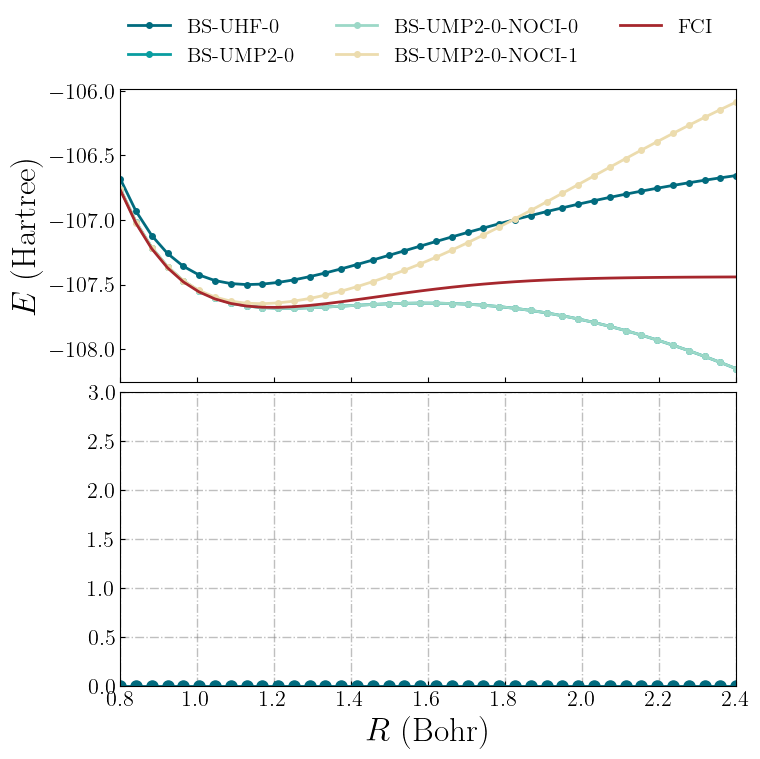

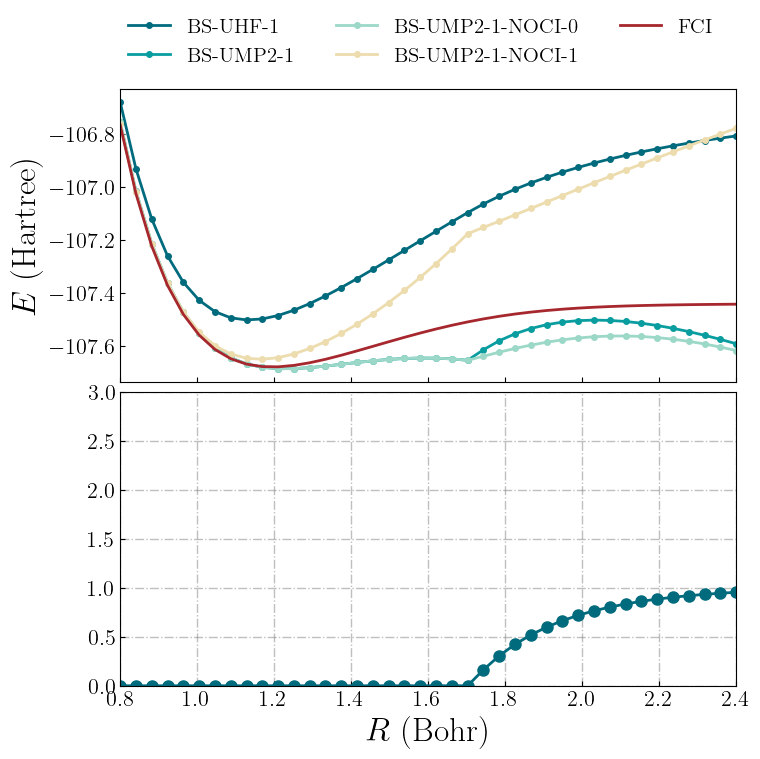

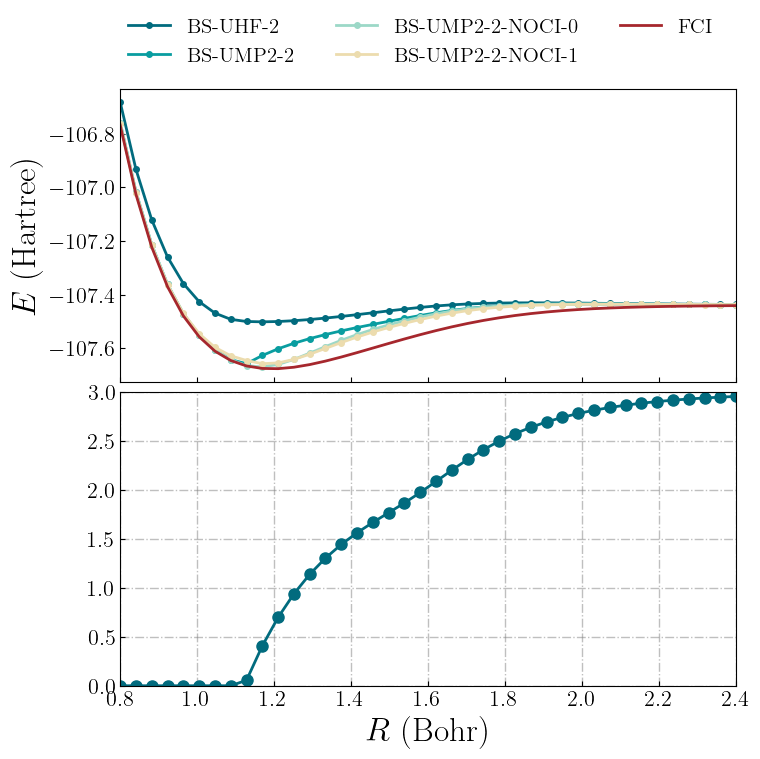

In [3]:
for ii in range(3):
    fig, axs = plt.subplots(2, 1, figsize=(8,8), sharex=True)
    data_dict = read_data_from_h5("./data/n2-bs-uhf-sto-3g.h5")

    ax = axs[0]
    label_list = []
    label_list.append(f"BS-UHF-{ii}")
    label_list.append(f"BS-UMP2-{ii}")
    # label_list.append(f"BS-UMP2-NOCI-0")
    # label_list.append(f"BS-UMP2-NOCI-1")
    label_list.append(f"BS-UMP2-{ii}-NOCI-0")
    label_list.append(f"BS-UMP2-{ii}-NOCI-1")
    label_list.append("FCI")

    for i, label in enumerate(label_list):

        if label == "FCI":
            style_dict[label] = {
                "color": colors[-1],
                "marker": "None",
                "linestyle": "-",
                "linewidth": 2.0,
                "markersize": 4.0,
                "label": label,
            }
        else:
            style_dict[label] = {
                "color": colors[i % len(colors)],
                "marker": "o",
                "linestyle": "-",
                "linewidth": 2.0,
                "markersize": 4.0,
                "label": label,
            }
    
    for i, label in enumerate(label_list):
        ax.plot(
            data_dict[label][:,0], 
            data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
            **style_dict[label])
    
    ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
            edgecolor='silver', frameon=False, fontsize=15, ncol=3)

    ax.set_ylabel(r"$E$ (Hartree)")
    ax.set_xlim(0.8, 2.4)
    # ax.set_ylim(-108.80, -106.6)

    ax = axs[1]
    label_list = [f"BS-UHF-{ii}-S2"]
    for i, label in enumerate(label_list):
        style_dict[label] = {
            "color": colors[i % len(colors)],
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 8.0,
            "label": label,
        }
        
    for i, label in enumerate(label_list):
        ax.plot(
            data_dict[label][:,0], 
            data_dict[label][:,1], 
            **style_dict[label])
    
    ax.set_ylim(0.0, 3.0)
    ax.grid(color='gray', linestyle='-.', linewidth=1, alpha=0.5)
    # ax.set_ylabel(r"$\lanlge S^2 \rangle$")
    ax.set_xlabel(r"$R$ (Bohr)")

    fig.tight_layout(w_pad=0.1, h_pad=0.1)